https://github.com/pideyi1025/DeepLabV3Plus-RailSem19/blob/main/preprocess.py

In [19]:
import os
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
# import numpy as np
# from matplotlib import pyplot as plt
# from patchify import patchify
# import tifffile as tiff
# from PIL import Image
# import tensorflow as tf
# from tensorflow import keras
# import segmentation_models as sm
# from tensorflow.keras.metrics import MeanIoU
# import random


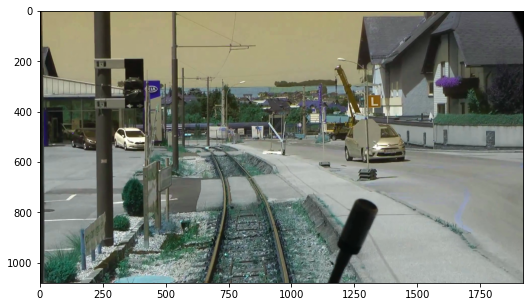

In [20]:
#Quick understanding of the dataset
temp_img = cv2.imread('rs19_val/jpgs/rs19_val/rs03179.jpg') #3 channels / spectral bands
plt.figure(figsize = (10,5))
plt.imshow(temp_img[:,:,:])

In [21]:
temp_img.shape

(1080, 1920, 3)

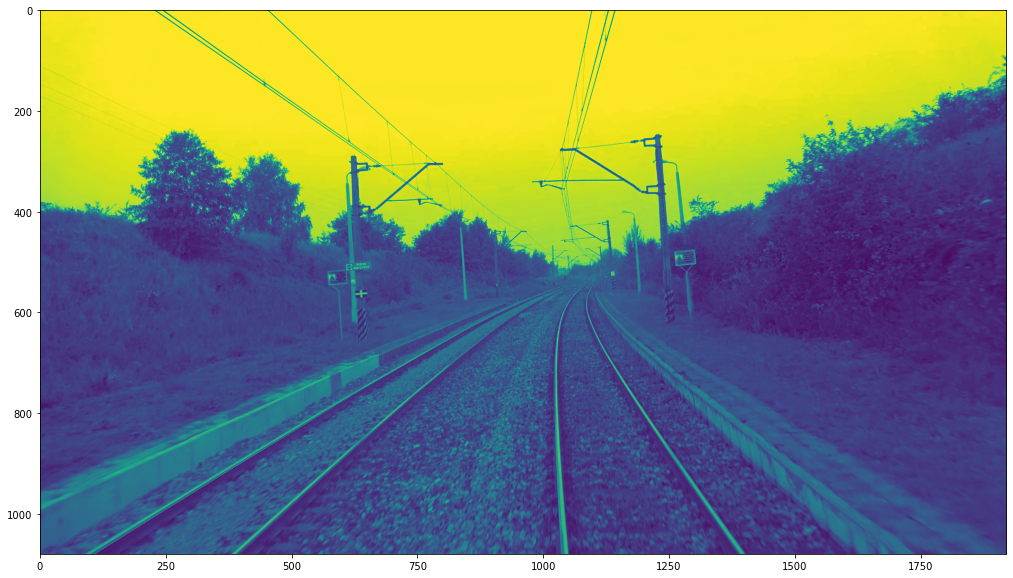

In [22]:
#Quick understanding of the dataset
temp_img = cv2.imread('rs19_val/jpgs/rs19_val/rs08171.jpg') #3 channels / spectral bands
plt.figure(figsize = (20,10))
plt.imshow(temp_img[:,:,0]) #View each channel...

In [23]:
labels_img, count_img=np.unique(temp_img[:,:,0], return_counts=True)

In [42]:
labels_img

array([  2,   3,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

In [43]:
count_img

array([     1,      1,      6,     10,     26,     42,     60,    140,
          261,    473,    732,   1030,   1444,   1919,   2415,   3204,
         3932,   4890,   5478,   6505,   7560,   8927,  10505,  12179,
        13544,  13949,  14115,  14347,  15533,  16388,  16809,  17208,
        17094,  17316,  18075,  18991,  19796,  20999,  22863,  23969,
        26104,  27997,  29573,  30717,  31921,  32616,  33078,  33075,
        32847,  32792,  33063,  32121,  30838,  29500,  27016,  25680,
        24930,  23875,  22468,  20725,  19389,  17704,  16418,  15583,
        15004,  14516,  13766,  13123,  12461,  11865,  11637,  11226,
        10699,  10039,   9655,   9313,   8789,   8903,   8534,   8317,
         8278,   7890,   7401,   6945,   6625,   6480,   6252,   6432,
         6637,   6540,   6216,   5497,   5713,   5079,   5187,   5409,
         5027,   4861,   4719,   4501,   4305,   4455,   3924,   4186,
         3956,   3710,   3335,   3004,   2662,   2334,   2271,   2126,
      

In [24]:
temp_img.shape

(1080, 1920, 3)

In [25]:
labels_img.shape

(253,)

In [26]:
count_img.shape

(253,)

In [27]:
temp_mask = cv2.imread('rs19_val/uint8/rs19_val/rs08171.png') #3 channels but all same. 
labels, count = np.unique(temp_mask[:,:,0], return_counts=True) #Check for each channel. All chanels are identical
print("Labels are: ", labels, " and the counts are: ", count)

Labels are:  [ 1  5  7  8  9 10 12 15 17]  and the counts are:  [ 87902  26120   3233 407270 447899 653323 157262 247332  43259]


In [28]:
temp_mask.shape

(1080, 1920, 3)

In [29]:
labels.shape

(9,)

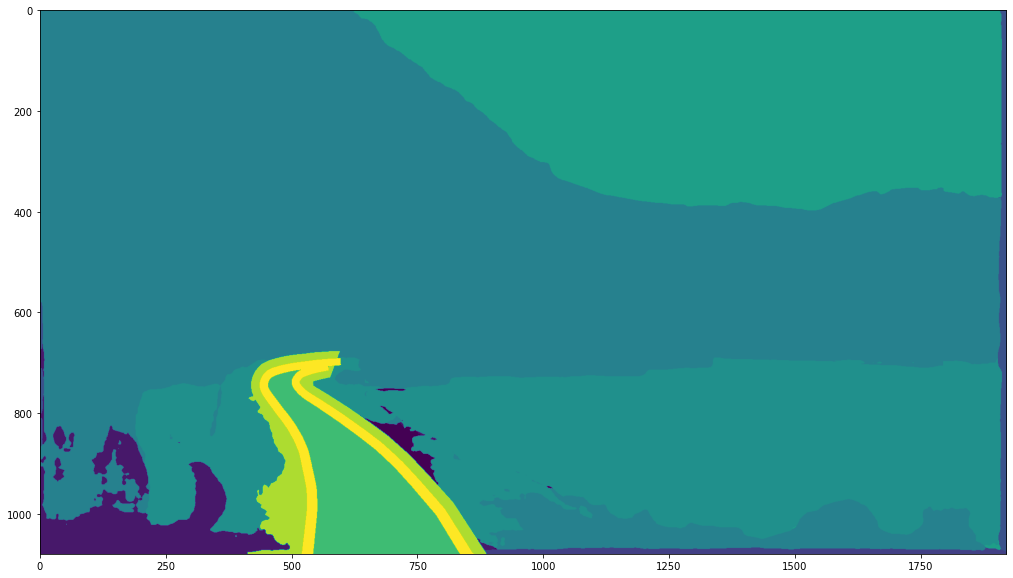

In [30]:
temp_mask = cv2.imread('rs19_val/uint8/rs19_val/rs00016.png')
plt.figure(figsize = (20,10))
plt.imshow(temp_mask[:,:,0]) 

In [31]:
temp_mask.shape

(1080, 1920, 3)

In [32]:
#check which labels are in the image
temp_mask = cv2.imread('rs19_val/uint8/rs19_val/rs08171.png') 
labels, count = np.unique(temp_mask[:,:,0], return_counts=True) 
labels

array([ 1,  5,  7,  8,  9, 10, 12, 15, 17], dtype=uint8)

In [33]:
CLASSES = ['road',
        'sidewalk',
        'construction',
        'tram-track',
        'fence',
        'pole',
        'traffic-light',
        'traffic-sign',
        'vegetation',
        'terrain',
        'sky',
        'human',
        'rail-track',
        'car',
        'truck',
        'trackbed',
        'on-rails',
        'rail-raised',
        'rail-embedded']

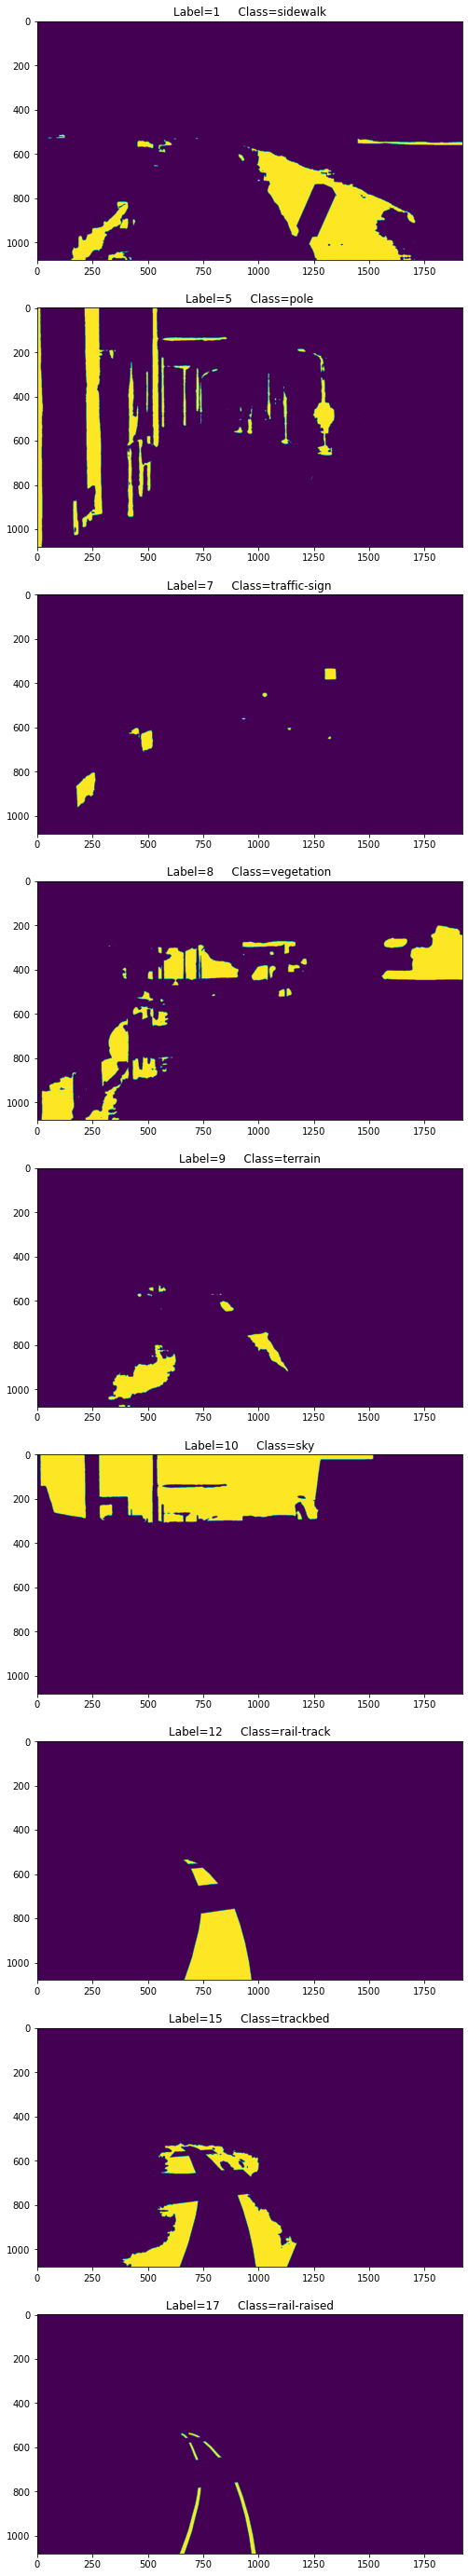

In [34]:
#print one image per label class
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 ) = plt.subplots(9, figsize=(100,50))
cls = 0
for  ax in fig.get_axes():
    temp_mask = cv2.imread('rs19_val/uint8/rs19_val/rs03179.png') 
    #this means that if the pixel labels are NOT the ones we care, make them all ZERO
    temp_mask[:,:,0][temp_mask[:,:,0]!=labels[cls]]=0
    ax.imshow(temp_mask[:,:,0]) 
    ax.title.set_text(f'Label={labels[cls]}     Class={CLASSES[labels[cls]]}')
    cls+= 1

# Deal with the json

In [35]:
import json

In [36]:
with open('rs19_val/jsons/rs19_val/rs07129.json') as json_file:
    data = json.load(json_file)
data['objects']

[{'boundingbox': [891, 424, 923, 430], 'label': 'switch-left'},
 {'boundingbox': [969, 414, 988, 417], 'label': 'switch-right'},
 {'boundingbox': [798, 129, 832, 197], 'label': 'track-signal-front'},
 {'boundingbox': [1135, 148, 1180, 228], 'label': 'track-signal-front'},
 {'boundingbox': [799, 221, 836, 278], 'label': 'track-signal-front'},
 {'boundingbox': [1130, 250, 1169, 307], 'label': 'track-signal-front'},
 {'boundingbox': [814, 383, 828, 476], 'label': 'track-sign-front'},
 {'boundingbox': [1054, 538, 1090, 556], 'label': 'switch-static'},
 {'boundingbox': [1133, 405, 1148, 498], 'label': 'track-sign-front'},
 {'boundingbox': [1060, 437, 1079, 456], 'label': 'track-sign-front'},
 {'label': 'pole',
  'polygon': [[807, 539],
   [808, 535],
   [812, 531],
   [812, 479],
   [812, 440],
   [813, 326],
   [813, 277],
   [805, 278],
   [800, 275],
   [798, 264],
   [800, 222],
   [807, 220],
   [807, 220],
   [813, 220],
   [813, 204],
   [802, 200],
   [797, 155],
   [799, 134],
   [

In [37]:
data

{'frame': 'rs07129',
 'imgHeight': 1080,
 'imgWidth': 1920,
 'objects': [{'boundingbox': [891, 424, 923, 430], 'label': 'switch-left'},
  {'boundingbox': [969, 414, 988, 417], 'label': 'switch-right'},
  {'boundingbox': [798, 129, 832, 197], 'label': 'track-signal-front'},
  {'boundingbox': [1135, 148, 1180, 228], 'label': 'track-signal-front'},
  {'boundingbox': [799, 221, 836, 278], 'label': 'track-signal-front'},
  {'boundingbox': [1130, 250, 1169, 307], 'label': 'track-signal-front'},
  {'boundingbox': [814, 383, 828, 476], 'label': 'track-sign-front'},
  {'boundingbox': [1054, 538, 1090, 556], 'label': 'switch-static'},
  {'boundingbox': [1133, 405, 1148, 498], 'label': 'track-sign-front'},
  {'boundingbox': [1060, 437, 1079, 456], 'label': 'track-sign-front'},
  {'label': 'pole',
   'polygon': [[807, 539],
    [808, 535],
    [812, 531],
    [812, 479],
    [812, 440],
    [813, 326],
    [813, 277],
    [805, 278],
    [800, 275],
    [798, 264],
    [800, 222],
    [807, 220],


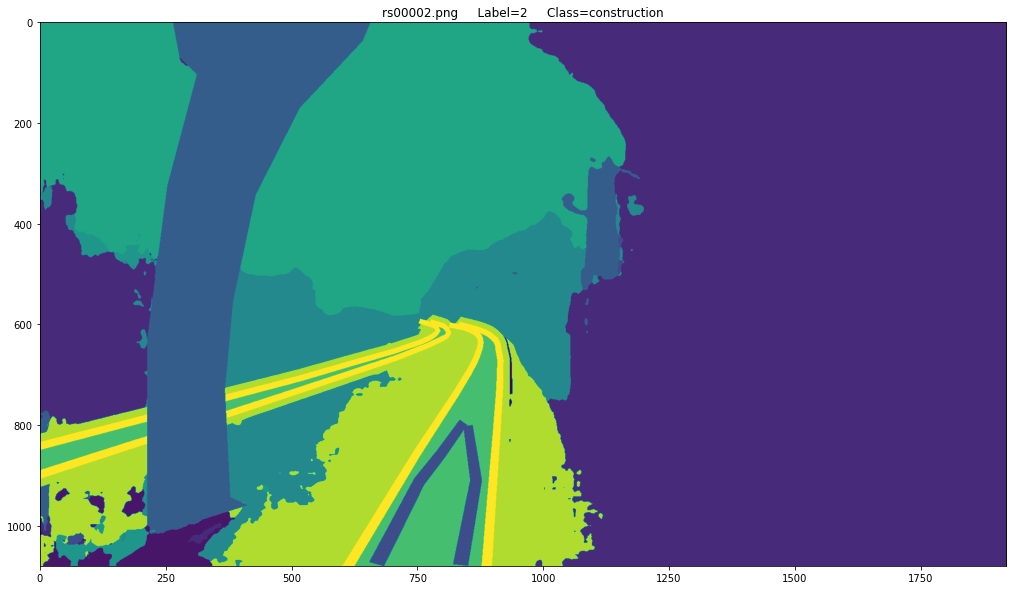

In [38]:
#these codes are used to loop through the directory
fig, ax = plt.subplots(1, figsize=(20,10))
cls = 0

path_images = 'rs19_val/uint8/rs19_val'
i=0
for filename in os.listdir(path_images):
    if filename.endswith('.png'):    
        temp_mask = cv2.imread('rs19_val/uint8/rs19_val/'+filename) 
        temp_mask[:,:,0][temp_mask[:,:,0]!=4]=0
        ax.imshow(temp_mask[:,:,0]) 
        ax.imshow(temp_mask[:,:,1]) 
        ax.imshow(temp_mask[:,:,2]) 
        ax.title.set_text(f'{filename}     Label={cls}     Class={CLASSES[cls]}')
        cls+= 1
    if cls == 3:
        break


# Check only veg

Labels are:  [ 1  5  7  8  9 10 12 15 17]  and the counts are:  [ 87902  26120   3233 407270 447899 653323 157262 247332  43259]


'\nrs00016\nrs00089\nrs00097\n\nrs00102 -> 8\n'

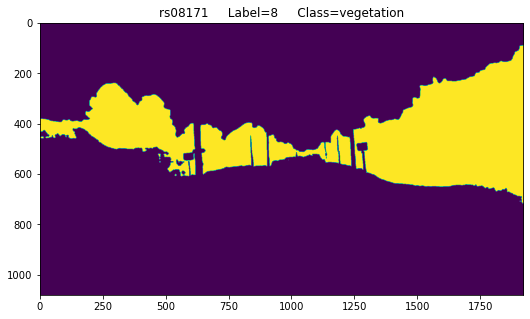

In [39]:
fig, ax = plt.subplots(1, figsize=(10,5))


path = 'rs19_val/uint8/rs19_val/'
filename = 'rs08171'
temp_mask = cv2.imread(path+filename+'.png') 


labels, count = np.unique(temp_mask[:,:,0], return_counts=True) #Check for each channel. All chanels are identical
print("Labels are: ", labels, " and the counts are: ", count)

temp_mask[:,:,0][temp_mask[:,:,0]!=8]=0

ax.imshow(temp_mask[:,:,0]) 
ax.title.set_text(f'{filename}     Label={8}     Class={CLASSES[8]}')



"""
rs00016
rs00089
rs00097

rs00102 -> 8
"""

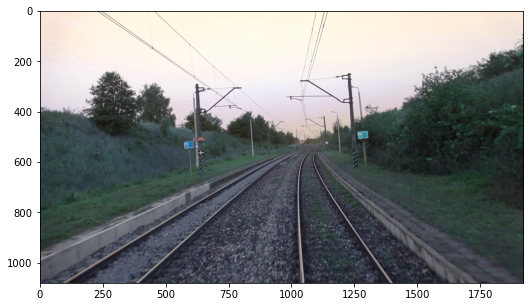

In [40]:
path = 'rs19_val/jpgs/rs19_val/'
fig, ax = plt.subplots(1, figsize=(10,5))
temp_img = cv2.imread(path+filename+'.jpg') 
ax.imshow(temp_img[:,:,:]) 